In [31]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def read_csv_to_arrays(filename):
    time_diff = []
    position = []
    angle = []

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            time_diff.append(float(row['time_diff']))
            position.append(float(row['position']))
            angle.append(float(row['angle']))

    return time_diff, position, angle

In [65]:
import numpy as np

# Initialize empty arrays to store data
position = []
angle = []
time_diff = []
time = []

# Iterate over the CSV files
for j in range(3):
    # Read data from CSV file
    t, p, a = read_csv_to_arrays(f'test{j+1}_15.csv')
    
    # Append data to respective lists
    time_diff.append(t)
    position.append(p)
    angle.append(a)

    temp_time = [0]
    for i in range(1, len(t)):
        temp_time.append(temp_time[i-1] + t[i])
    time.append(temp_time)

# Convert lists to numpy arrays
time_diff = np.array(time_diff)
position = np.array(position)
angle = np.array(angle)
time = np.array(time)

print("Position Array Shape:", position.shape)
print("Angle Array Shape:", angle.shape)
print("Time Difference Array Shape:", time_diff.shape)
print("Time Array Shape:", time.shape)


Position Array Shape: (3, 196)
Angle Array Shape: (3, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (3, 196)


In [67]:
def calculate_angular_velocity(angle, time_diff):
    angular_velocity = []
    for i in range(1, len(angle)):
        delta_angle = angle[i] - angle[i - 1]
        delta_time = time_diff[i]
        angular_velocity.append(delta_angle / delta_time)
    return angular_velocity

def calculate_velocity(position, time_diff):
    velocity = []
    for i in range(1, len(position)):
        delta_position = position[i] - position[i - 1]
        delta_time = time_diff[i]
        velocity.append(delta_position / delta_time)
    return velocity

# Example usage:
angular_velocity = []
velocity = []
for j in range(3):
    angular_velocity.append(calculate_angular_velocity(angle[j], time_diff[j]))
    velocity.append(calculate_velocity(position[j], time_diff[j]))

angular_velocity = np.array(angular_velocity)
velocity = np.array(velocity)

print("Angular Velocity:", angular_velocity.shape)
print("Velocity:", velocity.shape)

Angular Velocity: (3, 195)
Velocity: (3, 195)


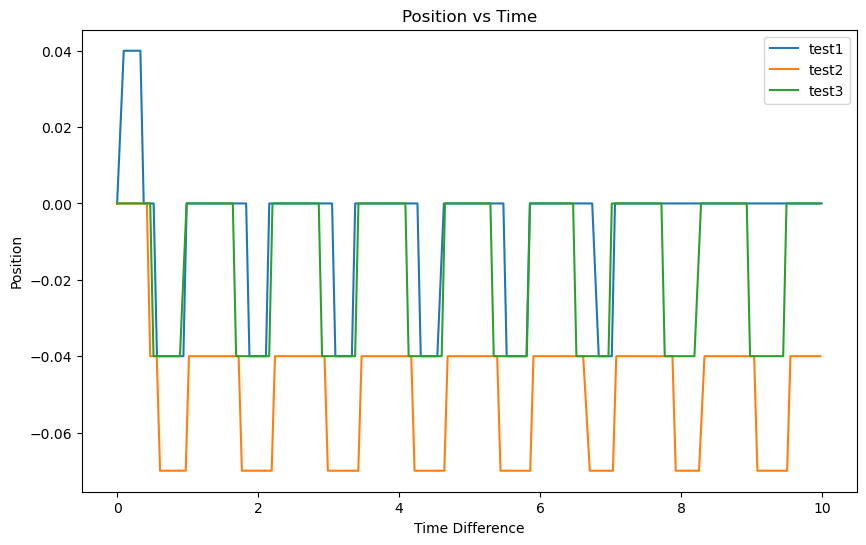

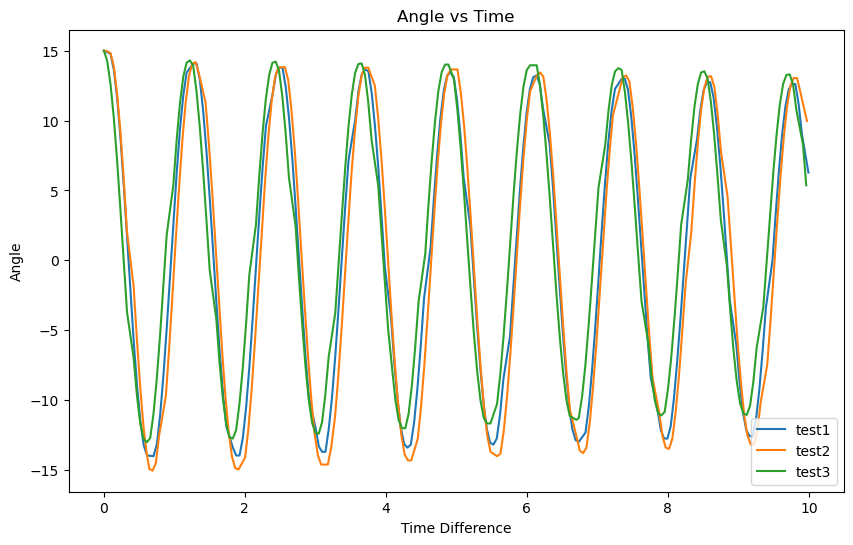

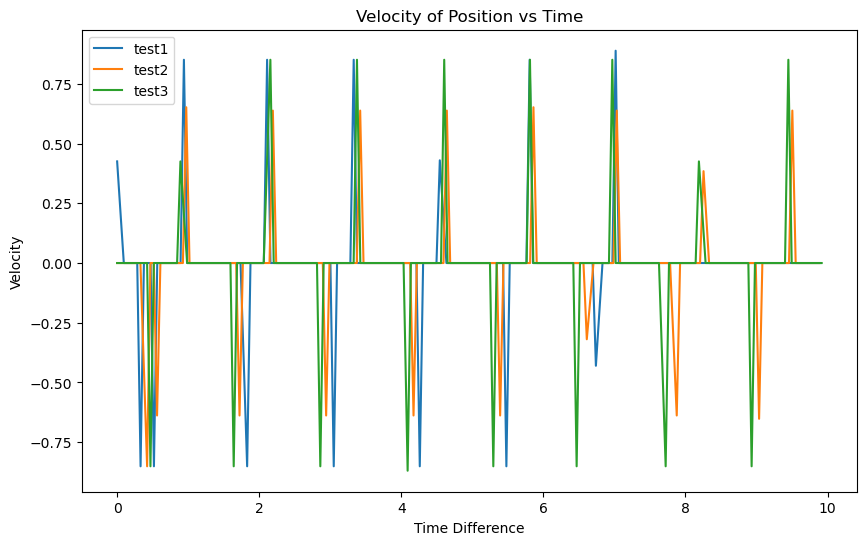

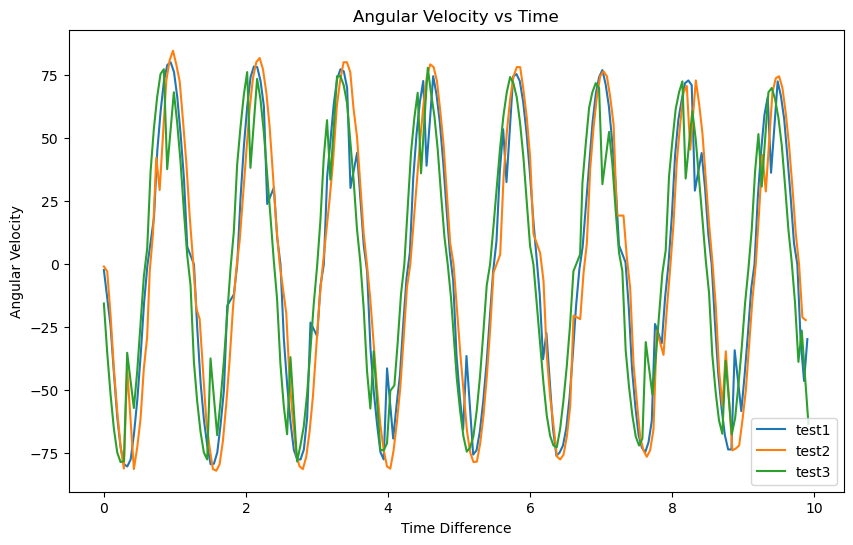

In [73]:
# Function to plot data
def plot_data(time, position, angle, velocity, angular_velocity):
    # Plot Position
    plt.figure(figsize=(10, 6))
    plt.plot(time[0], position[0], label='test1')
    plt.plot(time[1], position[1], label='test2')
    plt.plot(time[2], position[2], label='test3')
    plt.xlabel('Time Difference')
    plt.ylabel('Position')
    plt.title('Position vs Time')
    plt.legend()
    plt.show()

    # # Plot Angle
    plt.figure(figsize=(10, 6))
    plt.plot(time[0], angle[0], label='test1')
    plt.plot(time[1], angle[1], label='test2')
    plt.plot(time[2], angle[2], label='test3')
    plt.xlabel('Time Difference')
    plt.ylabel('Angle')
    plt.title('Angle vs Time')
    plt.legend()
    plt.show()

    # # Plot Velocity of Position
    plt.figure(figsize=(10, 6))
    plt.plot(time[0][:-1], velocity[0], label='test1')
    plt.plot(time[1][:-1], velocity[1], label='test2')
    plt.plot(time[2][:-1], velocity[2], label='test3')
    plt.xlabel('Time Difference')
    plt.ylabel('Velocity')
    plt.title('Velocity of Position vs Time')
    plt.legend()
    plt.show()

    # # Plot Angular Velocity
    plt.figure(figsize=(10, 6))
    plt.plot(time[0][:-1], angular_velocity[0], label='test1')
    plt.plot(time[1][:-1], angular_velocity[1], label='test2')
    plt.plot(time[2][:-1], angular_velocity[2], label='test3')
    plt.xlabel('Time Difference')
    plt.ylabel('Angular Velocity')
    plt.title('Angular Velocity vs Time')
    plt.legend()
    plt.show()

# Call the function to plot data
plot_data(time, position, angle, velocity, angular_velocity)
